In [1]:
#https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000
#desarrollo incompleto - está diseñado para versiones anteriores

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [26]:
data = pd.read_csv('./data/2022PVER.csv')
print(data)
print('\n Data Types:')
data.dtypes

        fecha   y
0   2022-3-22   0
1   2022-3-27  25
2   2022-4-10   0
3   2022-4-24  34
4    2022-5-8  26
5   2022-5-22  25
6   2022-5-29  15
7   2022-6-12  25
8   2022-6-19  25
9    2022-7-3   6
10  2022-7-10  27
11  2022-7-24  25
12  2022-7-31  25

 Data Types:


fecha    object
y         int64
dtype: object

In [27]:
from datetime import datetime
con=data['fecha']
data['fecha']=pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2022-03-22', '2022-03-27', '2022-04-10', '2022-04-24',
               '2022-05-08', '2022-05-22', '2022-05-29', '2022-06-12',
               '2022-06-19', '2022-07-03', '2022-07-10', '2022-07-24',
               '2022-07-31'],
              dtype='datetime64[ns]', name='fecha', freq=None)

In [28]:
#convert to time series:
ts = data['y']
ts.head(10)

fecha
2022-03-22     0
2022-03-27    25
2022-04-10     0
2022-04-24    34
2022-05-08    26
2022-05-22    25
2022-05-29    15
2022-06-12    25
2022-06-19    25
2022-07-03     6
Name: y, dtype: int64

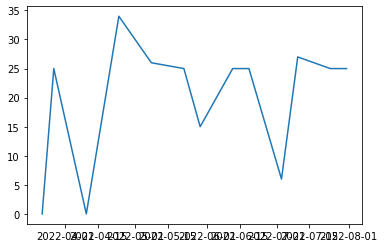

In [32]:
plt.plot(ts)

In [65]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

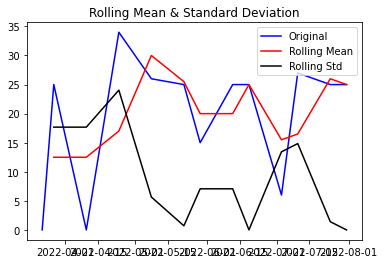

Results of Dickey-Fuller Test:
Test Statistic                 -5.472690
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [66]:
test_stationarity(ts)

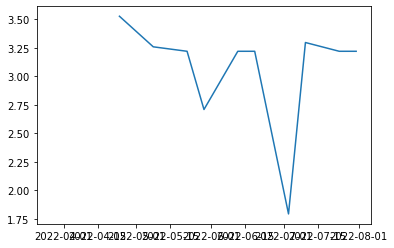

In [36]:
ts_log = np.log(ts)
plt.plot(ts_log)

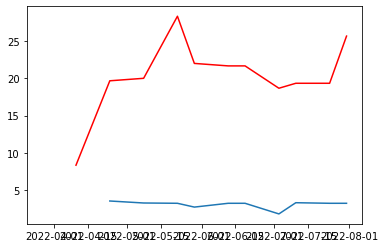

In [74]:
moving_avg = ts.rolling(3).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [75]:
ts_log_moving_avg_diff = ts_log = moving_avg
ts_log_moving_avg_diff.head(12)

fecha
2022-03-22          NaN
2022-03-27          NaN
2022-04-10     8.333333
2022-04-24    19.666667
2022-05-08    20.000000
2022-05-22    28.333333
2022-05-29    22.000000
2022-06-12    21.666667
2022-06-19    21.666667
2022-07-03    18.666667
2022-07-10    19.333333
2022-07-24    19.333333
Name: y, dtype: float64

In [78]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

fecha
2022-04-10     8.333333
2022-04-24    19.666667
2022-05-08    20.000000
2022-05-22    28.333333
2022-05-29    22.000000
Name: y, dtype: float64

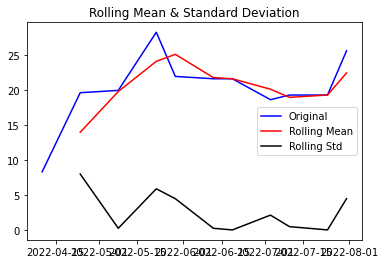

Results of Dickey-Fuller Test:
Test Statistic                 -4.044570
p-value                         0.001194
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [79]:
test_stationarity(ts_log_moving_avg_diff)

ValueError: setting an array element with a sequence.

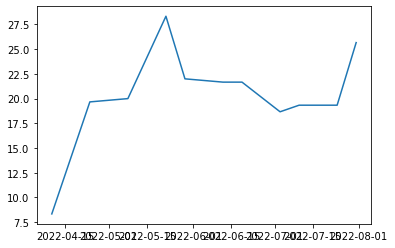

In [88]:
expwighted_avg = ts_log.ewm(halflife=2)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')